# EDA Shopping Behavior

In [1]:
!pip install geopy

In [2]:
!pip install matplotlib -q
!pip install seaborn -q

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

font_path = 'c:\\Windows\\Fonts\\GULIM.TTC' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties (fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용

plt.rc('axes', unicode_minus=False)

### 01. 데이터 수집 및 로드

In [4]:
shopping_df = pd.read_csv('../data/shopping_behavior_updated.csv')
shopping_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### 02. 데이터구조 및 변수 이해

In [5]:
print(shopping_df.shape)
print(shopping_df.dtypes)
shopping_df.info()

(3900, 18)
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null  

### 03. 데이터 요약 및 기술통계

In [6]:
# 수치형 컬럼만 선택
numeric_df = shopping_df.select_dtypes(include=['number'])

# 범주형 컬럼만 선택
categorical_df = shopping_df.select_dtypes(include=['object', 'category'])

# 확인
display(numeric_df.describe())
display(categorical_df.describe())

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


### 04. 결측치, 이상치

In [7]:
shopping_df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
shopping_df.duplicated('Customer ID').sum()

np.int64(0)

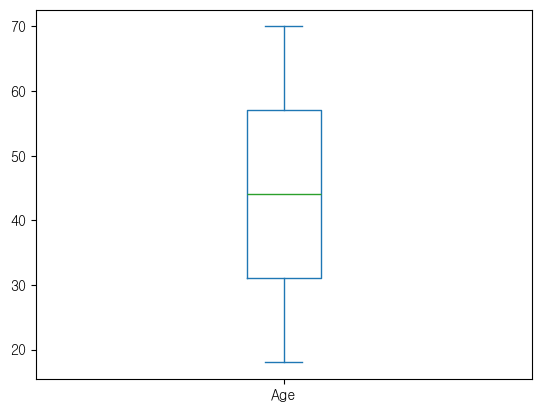

In [9]:
shopping_df['Age'].plot(kind='box')
plt.show()

### 05. 변수분포 시각화

목차

    1. 미국 지역별 온라인 판매 현황
 
    2. 전략지역 분석

    3. 서부지역 구매력과 가격 전략 분석

    4. 서부지역 지역/계절별 트렌드 분석

    5. 서부지역 고객 충성도 및 재구매 분석

    6. 서부지역 물류 및 결제 효율 분석

C:\Users\TJ\AppData\Local\Temp\ipykernel_20376\2906681815.py:62: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=65, random_state=42) if len(x) >= 65 else x)


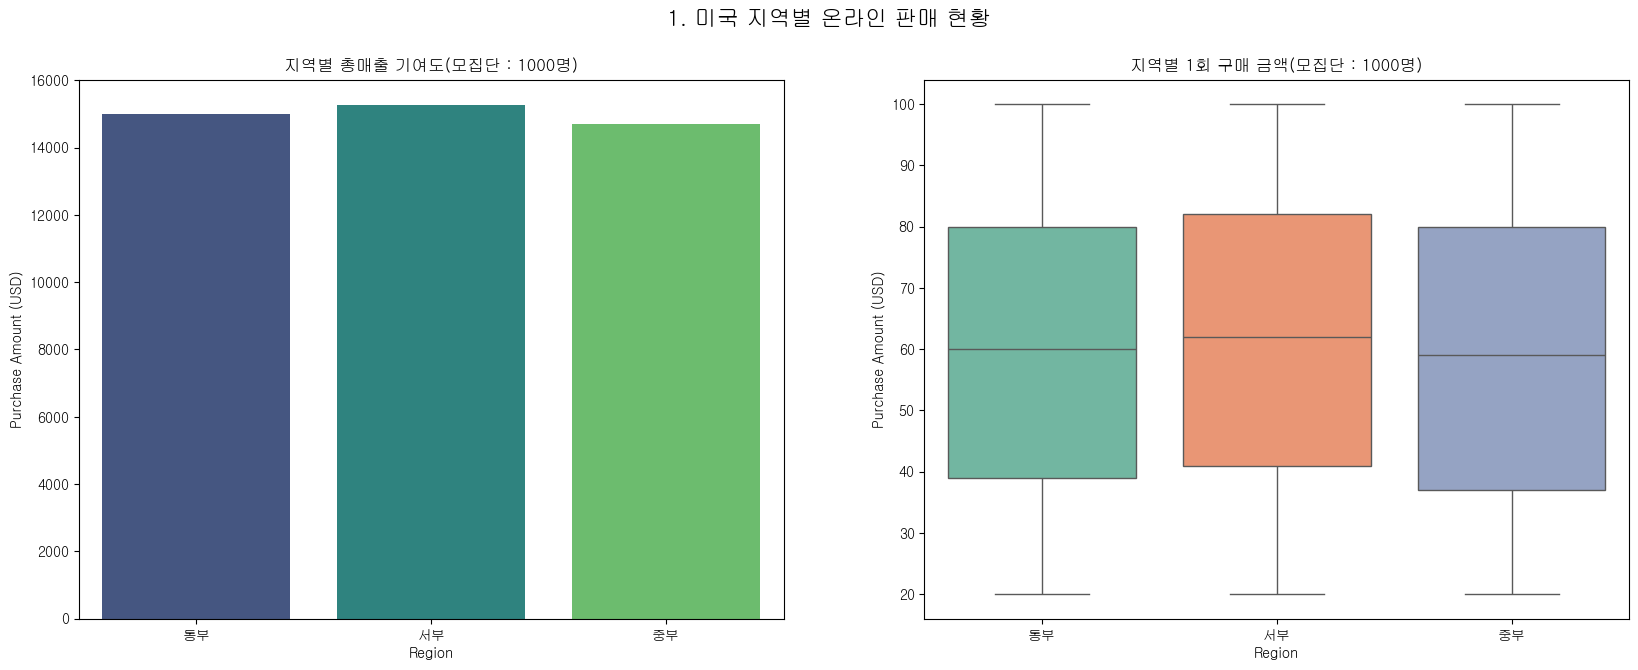

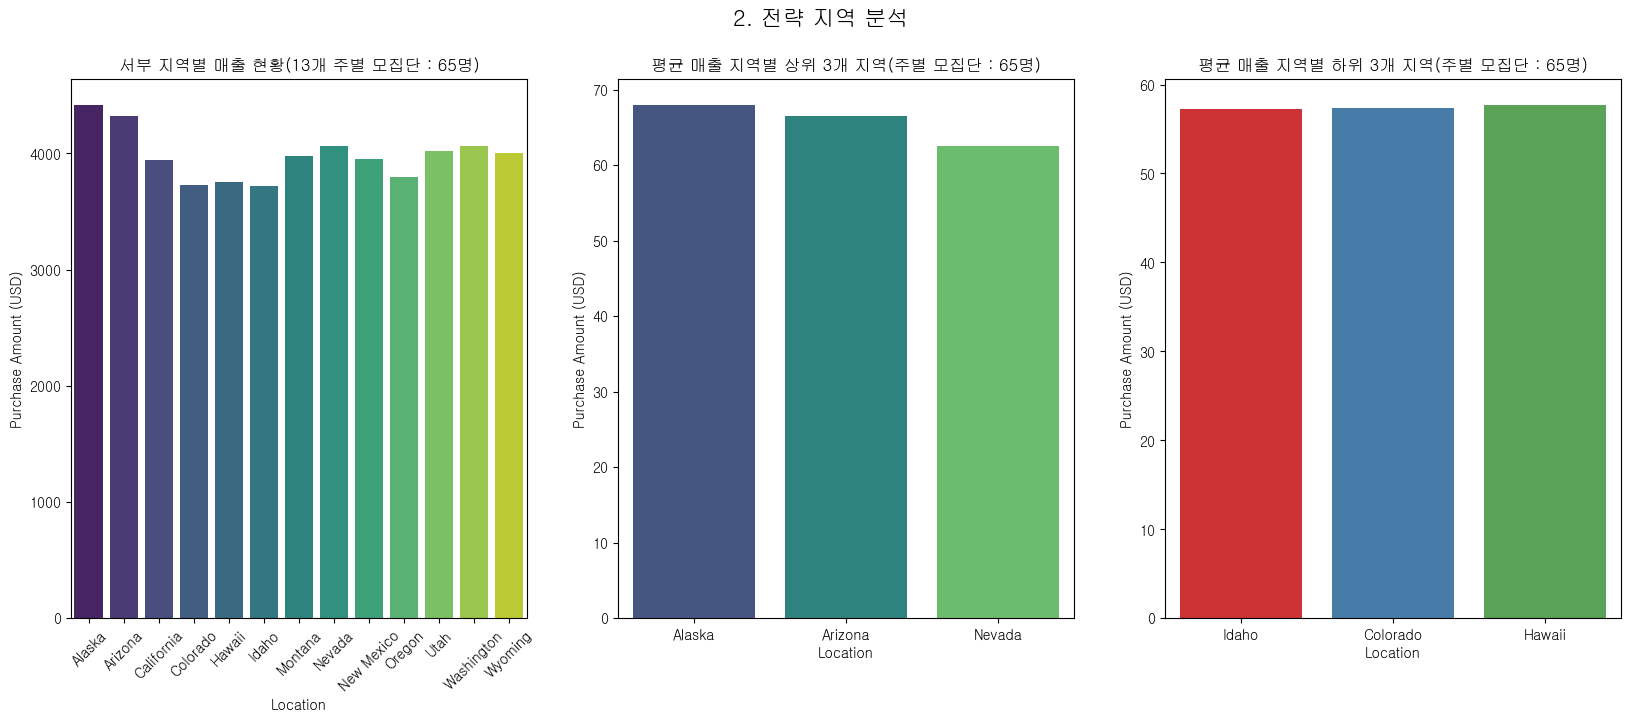

In [22]:
# 지역별 판매 현황

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
            return '동부'
    elif location in CENTRAL_STATES :
            return '중부'
    else:
            return '서부'    

if 'Region' not in shopping_df.columns:
    shopping_df['Region'] = shopping_df['Location'].apply(location_separate)

    sampled_shopping_df = (
        shopping_df.groupby('Region', group_keys=False)
        .apply(lambda x: x.sample(n=1000, random_state=42))
    )

location_total_df = sampled_shopping_df.groupby(['Season', 'Region'])['Purchase Amount (USD)'].sum().reset_index()

sns.barplot(data=location_total_df, 
            x='Region',
            y='Purchase Amount (USD)',     
            hue='Region',
            palette='viridis',
            errorbar=None,
            ax=ax[0]
            )

sns.boxplot(data=sampled_shopping_df, 
            x='Region',
            y='Purchase Amount (USD)',
            hue='Region',
            palette='Set2',            
            ax=ax[1]
            )

ax[0].set_title('지역별 총매출 기여도(모집단 : 1000명)')
ax[1].set_title('지역별 1회 구매 금액(모집단 : 1000명)')

plt.suptitle("1. 미국 지역별 온라인 판매 현황", fontsize=16, fontweight='bold')


# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------

# 2. 전략 지역 분석

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

west_shopping_df = shopping_df[shopping_df['Region']=='서부']

sampled_westshopping_df = (
    west_shopping_df.groupby('Location', group_keys=False)
    .apply(lambda x: x.sample(n=65, random_state=42) if len(x) >= 65 else x)
)

total_westsales_df = sampled_westshopping_df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()

sns.barplot(data=total_westsales_df,
            x='Location',
            y='Purchase Amount (USD)',
            hue='Location',
            palette='viridis',
            ax=ax[0]             
            )

total_lar_westsales_df = sampled_westshopping_df.groupby('Location')['Purchase Amount (USD)'].mean().nlargest(3).reset_index()
total_sma_westsales_df = sampled_westshopping_df.groupby('Location')['Purchase Amount (USD)'].mean().nsmallest(3).reset_index()

sns.barplot(data=total_lar_westsales_df,
            x='Location',
            y='Purchase Amount (USD)',
            hue='Location',
            ax=ax[1],
            palette='viridis'             
            )

sns.barplot(data=total_sma_westsales_df,
            x='Location',
            y='Purchase Amount (USD)',
            hue='Location',
            ax=ax[2],
            palette='Set1'             
            )

plt.suptitle("2. 전략 지역 분석", fontsize=16, fontweight='bold')

ax[0].tick_params(axis='x', rotation=45)

ax[0].set_title('서부 지역별 매출 현황(13개 주별 모집단 : 65명)')
ax[1].set_title('평균 매출 지역별 상위 3개 지역(주별 모집단 : 65명)')
ax[2].set_title('평균 매출 지역별 하위 3개 지역(주별 모집단 : 65명)')

plt.show()


plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_20376\2354650235.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  low_3sales_total_df = low_3sales_df.groupby(['Gender', 'AgeGroup', 'Category', 'Discount Applied', 'Promo Code Used', 'Review Rating', 'Location'])['Purchase Amount (USD)'].sum().reset_index()


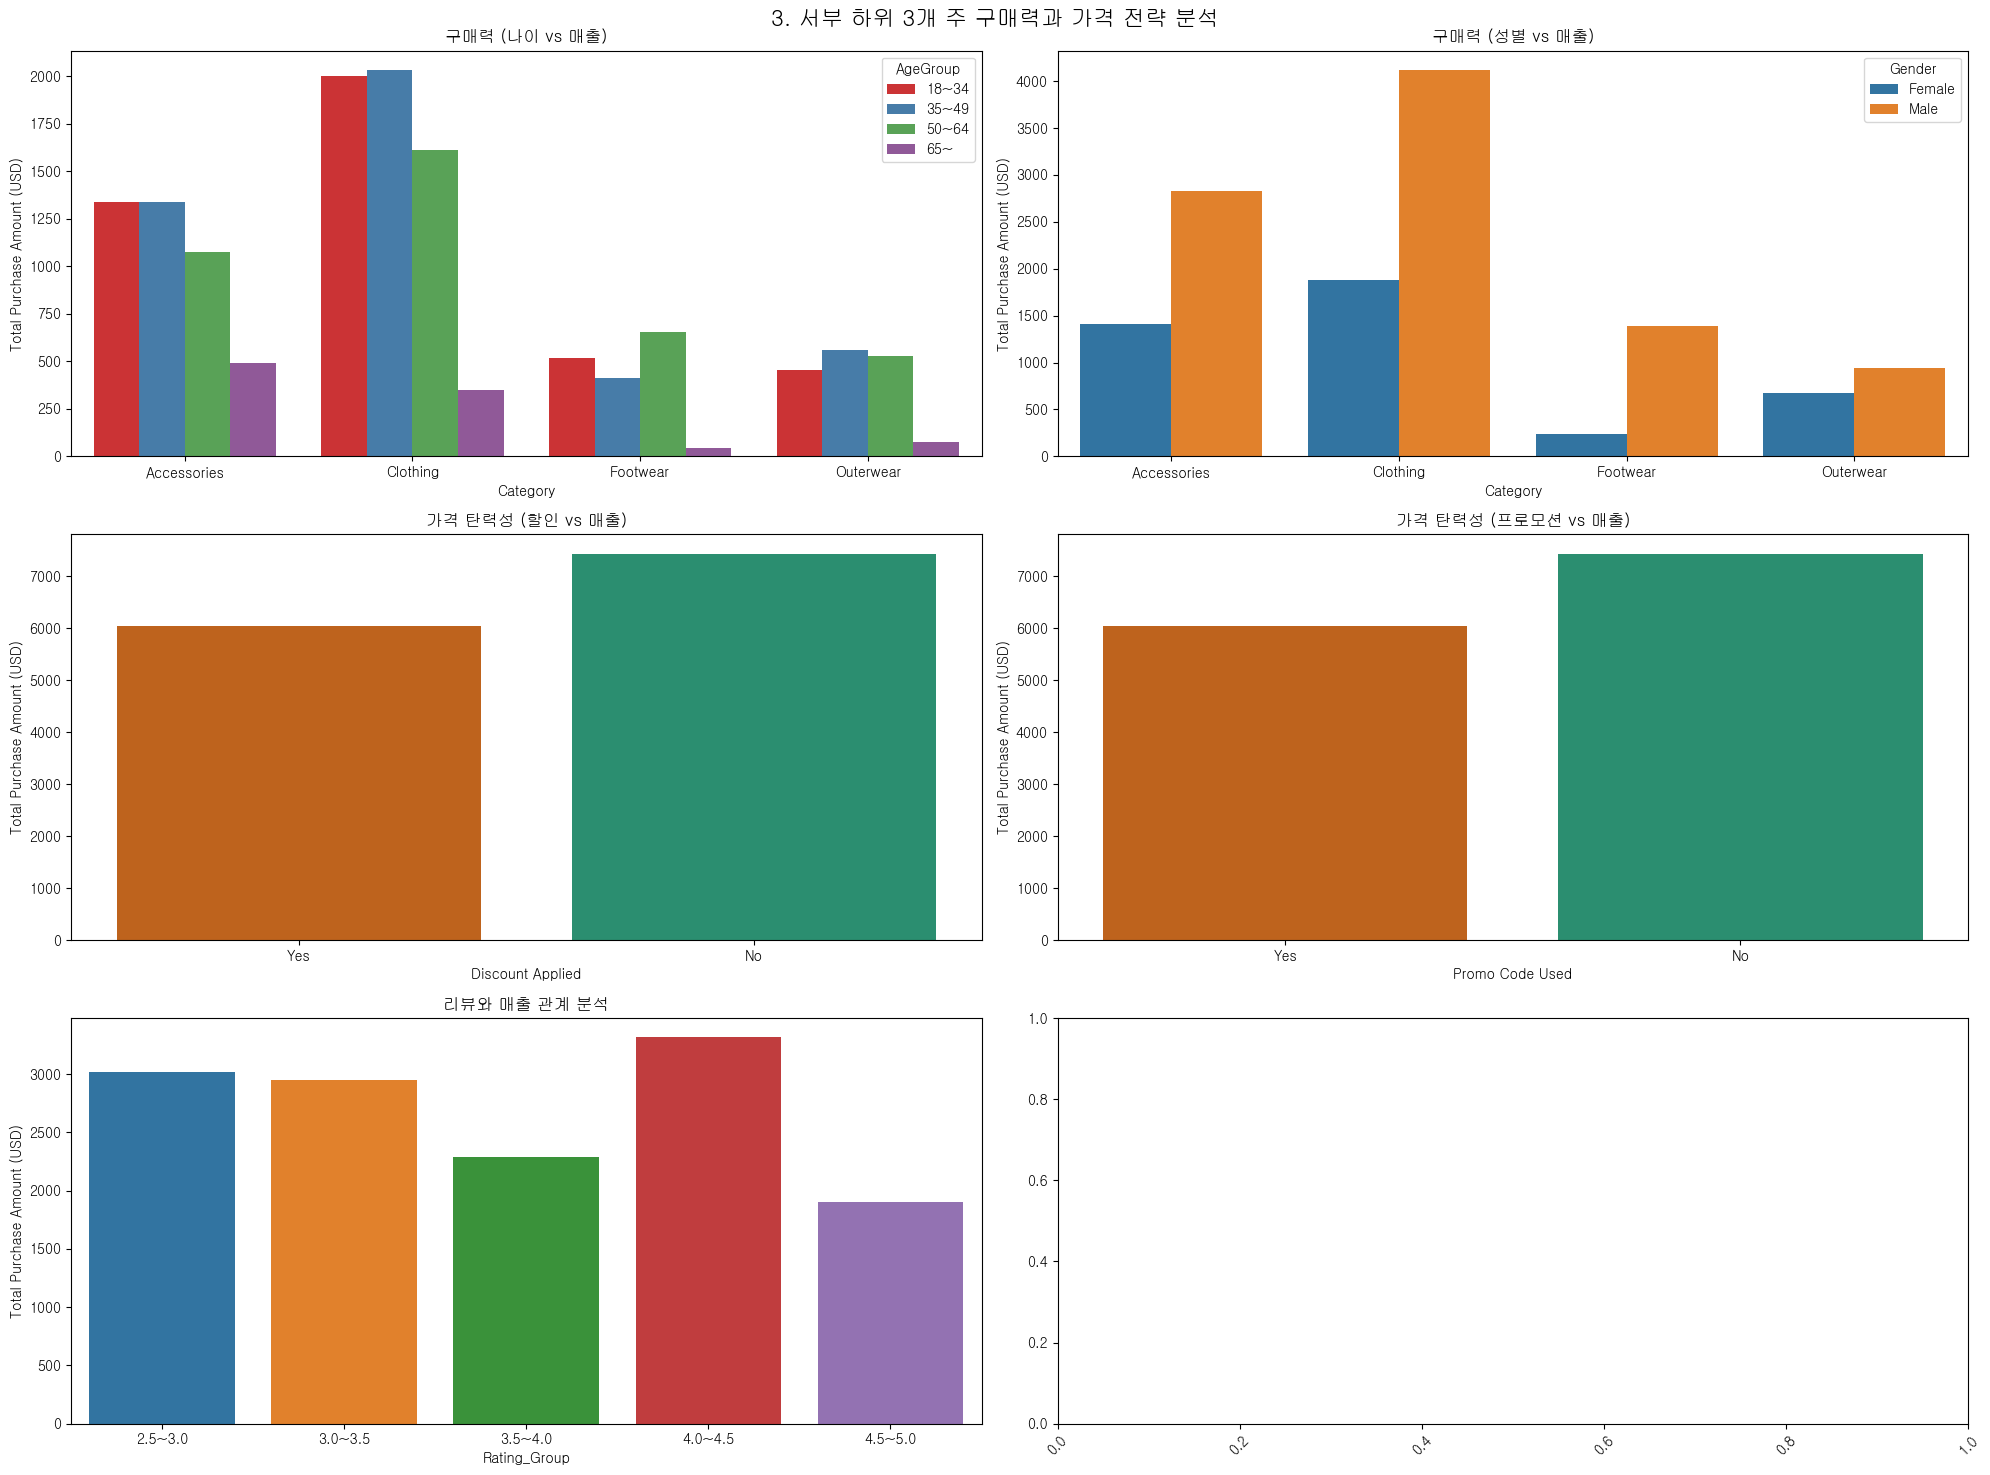

In [23]:
# 2. 구매력과 가격 전략 분석

fig, ax = plt.subplots(3, 2, figsize=(20, 15))

target_locations = ['Idaho', 'Colorado', 'Hawaii']
low_3sales_df = west_shopping_df[west_shopping_df['Location'].isin(target_locations)]

#     구매력 Gender, Age, Category ----------------------

low_3sales_total_df = low_3sales_df.groupby(['Gender', 'AgeGroup', 'Category', 'Discount Applied', 'Promo Code Used', 'Review Rating', 'Location'])['Purchase Amount (USD)'].sum().reset_index()
low_3sales_total_df.columns = ['Gender', 'AgeGroup', 'Category', 'Discount Applied', 'Promo Code Used', 'Review Rating', 'Location', 'Total Purchase Amount (USD)']

sns.barplot(data=low_3sales_total_df,
            x='Category',
            y='Total Purchase Amount (USD)',
            hue='AgeGroup',
            estimator='sum',
            palette='Set1',
            errorbar=None,
            ax=ax[0, 0]            
            )

sns.barplot(data=low_3sales_total_df,
            x='Category',
            y='Total Purchase Amount (USD)',
            hue='Gender',
            estimator='sum',
            palette='tab10',
            errorbar=None,
            ax=ax[0, 1]            
            )

#     가격탄력성 Discount Applied, Promo Code Used ----------

orderYN = ['Yes', 'No']

sns.barplot(data=low_3sales_total_df,
            x='Discount Applied',
            y='Total Purchase Amount (USD)',            
            hue='Discount Applied',
            estimator='sum',
            palette='Dark2',
            errorbar=None,
            order=orderYN,
            ax=ax[1, 0]           
            )

sns.barplot(data=low_3sales_total_df,
            x='Promo Code Used',
            y='Total Purchase Amount (USD)',            
            hue='Promo Code Used',
            estimator='sum',
            palette='Dark2',
            errorbar=None,
            order=orderYN,
            ax=ax[1, 1]            
            )

#     리뷰와 매출 관계 Review Rating, Purchase Amount ----------

bins = [2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['2.5~3.0', '3.0~3.5', '3.5~4.0', '4.0~4.5', '4.5~5.0']

low_3sales_total_df['Rating_Group'] = pd.cut(
    low_3sales_total_df['Review Rating'],
    bins=bins,
    labels=labels, 
    right=True,
    include_lowest=True
)

sns.barplot(data=low_3sales_total_df,
            x='Rating_Group',
            y='Total Purchase Amount (USD)',            
            hue='Rating_Group',
            estimator='sum',
            palette='tab10',
            errorbar=None,
            ax=ax[2, 0]            
            )


ax[2, 1].tick_params(axis='x', rotation=45)

plt.suptitle("3. 서부 하위 3개 주 구매력과 가격 전략 분석", fontsize=16, fontweight='bold')

# 2. 구매력과 가격 전략 분석
ax[0, 0].set_title('구매력 (나이 vs 매출)')
ax[0, 1].set_title('구매력 (성별 vs 매출)')
ax[1, 0].set_title('가격 탄력성 (할인 vs 매출)')
ax[1, 1].set_title('가격 탄력성 (프로모션 vs 매출)')
ax[2, 0].set_title('리뷰와 매출 관계 분석')

plt.tight_layout() 

plt.show()

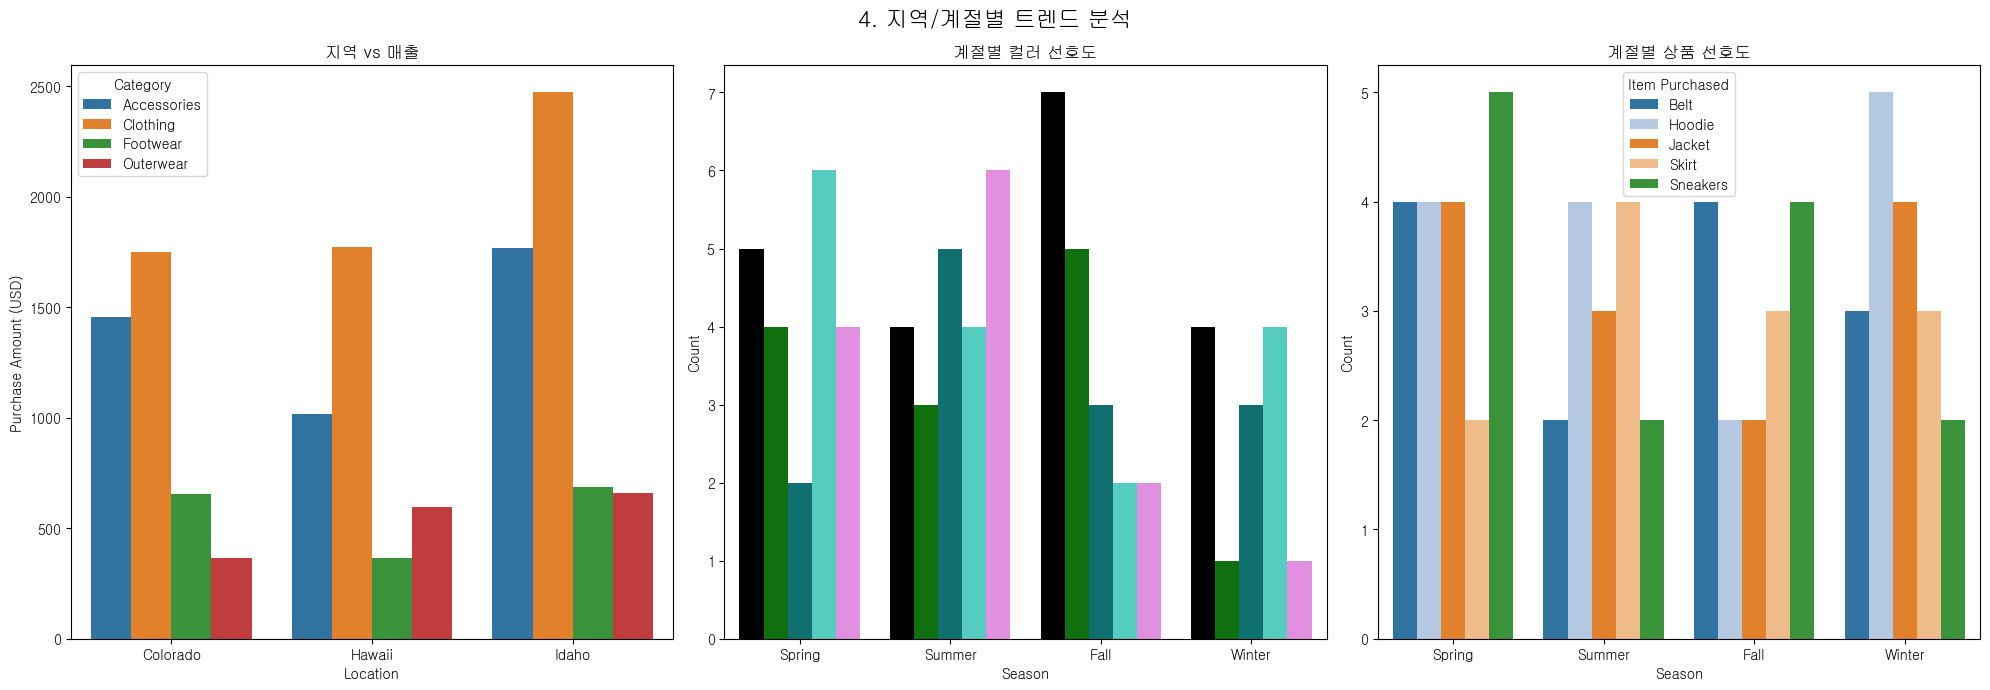

In [24]:
# 4. 지역/계절별 트렌드 분석

#     지역별 구매 Location, Category ----------

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

low_3sales_location_season_df = low_3sales_df.groupby(['Location', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

sns.barplot(data=low_3sales_location_season_df,
            x='Location',
            y='Purchase Amount (USD)',   
            hue='Category',         
            estimator='mean',
            palette='tab10',
            errorbar=None,
            ax=ax[0]               
            ) 

#     계절별 칼러 및 상품 선호도 Season, Item Purchased, Color

top_5_colors = low_3sales_df['Color'].value_counts().nlargest(5).index
filtered_low_3sales_df = low_3sales_df[low_3sales_df['Color'].isin(top_5_colors)]
color_low_3sales_df = filtered_low_3sales_df.groupby(['Season', 'Color'])['Item Purchased'].count().reset_index(name='Count')


custom_color_palette = {
    
    'Beige'     :   '#F5F5DC',
    'Black'     :   'Black',
    'Blue'      :   'Blue',
    'Brown'     :   '#A52A2A',
    'Charcoal'  :   '#36454F',
    'Cyan'      :   'Cyan',
    'Gold'      :   'Gold',
    'Gray'      :   'Gray',
    'Green'     :   'Green',
    'Indigo'    :   '#4B0082',
    'Lavender'  :   '#E6E6FA',
    'Magenta'   :   'Magenta',
    'Maroon'    :   '#800000',
    'Olive'     :   'Olive',
    'Orange'    :   'Orange',
    'Peach'     :   '#FFE5B4',
    'Pink'      :   'Pink',
    'Purple'    :   'Purple',
    'Red'       :   'Red',
    'Silver'    :   '#C0C0C0',
    'Teal'      :   'Teal',
    'Turquoise' :   '#40E0D0',
    'Violet'    :   'Violet',
    'White'     :   'White',
    'Yellow'    :   'Yellow'
            
}

order = ['Spring', 'Summer', 'Fall', 'Winter']

sns.barplot(data=color_low_3sales_df,
            x='Season',
            y='Count', 
            hue='Color',
            order=order,
            palette=custom_color_palette,
            errorbar=None,            
            ax=ax[1]            
            )

top_5items=low_3sales_df['Item Purchased'].value_counts().nlargest(5).index
filtered_low_3sales_df=low_3sales_df[low_3sales_df['Item Purchased'].isin(top_5items)]

season_low_3sales_df = filtered_low_3sales_df.groupby(['Season', 'Item Purchased'])['Item Purchased'].count().reset_index(name='Count')

sns.barplot(data=season_low_3sales_df,
            x='Season',
            y='Count', 
            hue='Item Purchased',
            order=order,
            palette='tab20',
            errorbar=None,
            ax=ax[2]            
            )

plt.suptitle("4. 지역/계절별 트렌드 분석", fontsize=16, fontweight='bold')

ax[1].legend().set_visible(False)

# 3. 지역/계절별 트렌드 분석
ax[0].set_title('지역 vs 매출')
ax[1].set_title('계절별 컬러 선호도')
ax[2].set_title('계절별 상품 선호도')

plt.tight_layout() 

plt.show()

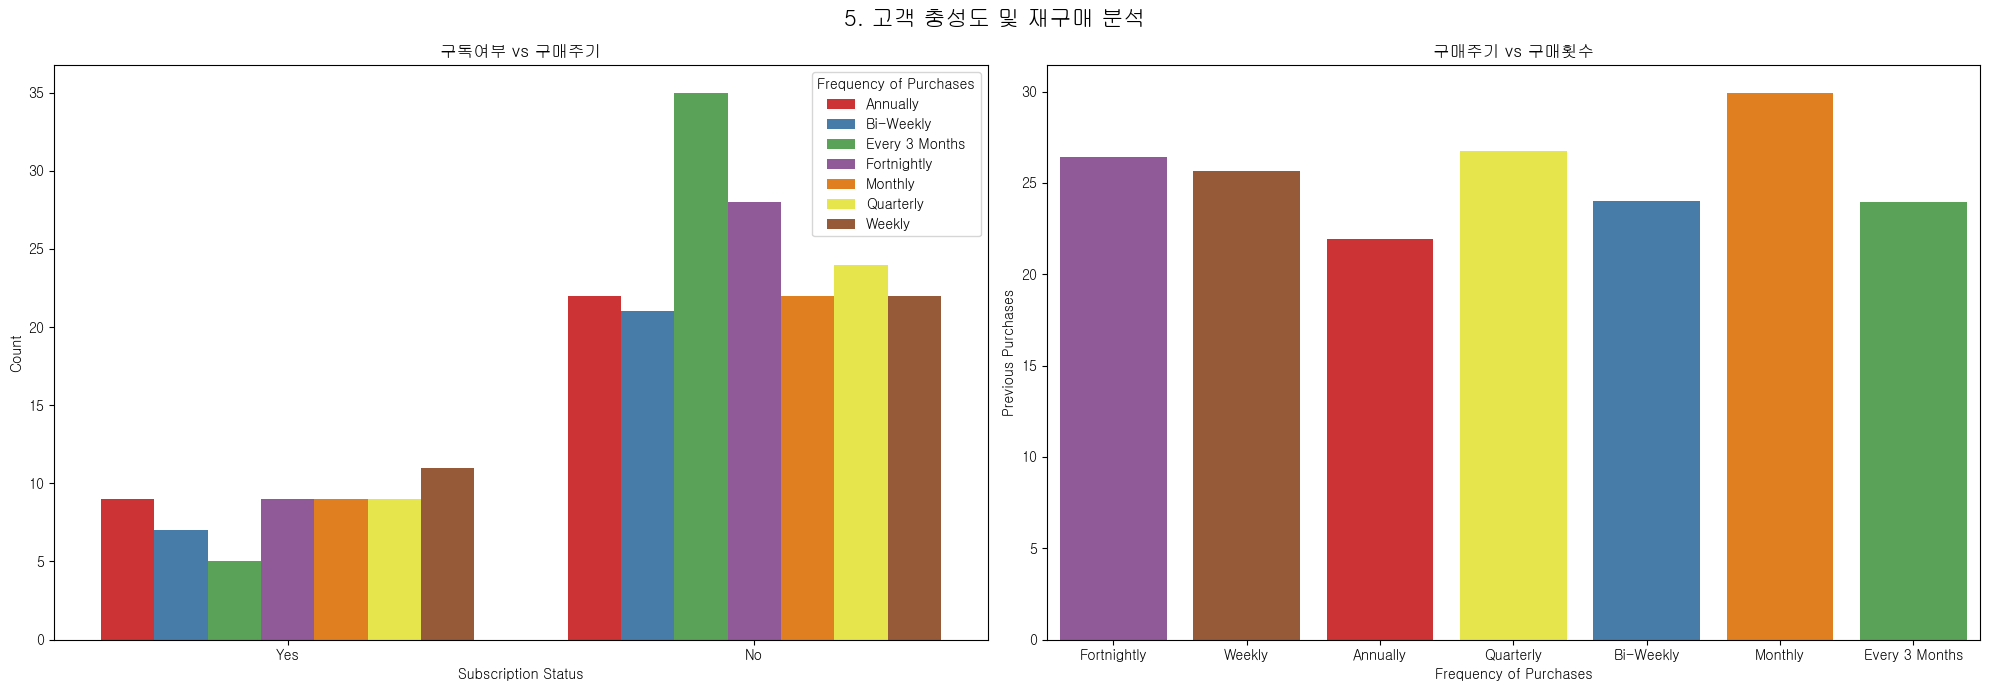

In [ ]:
# 5. 고객 충성도 및 재구매 분석
#     구독영향 Subscription Status, Frequency of Purchases

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

subscription_low_3sales_df = low_3sales_df.groupby(['Subscription Status', 'Frequency of Purchases'])['Item Purchased'].count().reset_index()
subscription_low_3sales_df.columns = ['Subscription Status', 'Frequency of Purchases', 'Count']

sns.barplot(data=subscription_low_3sales_df,
            x='Subscription Status',
            y='Count', 
            hue='Frequency of Purchases',
            palette='Set1',
            errorbar=None,
            order=orderYN,
            ax=ax[0],                     
            )

#     충성도높은고객 Previous Purchase, Frequency of Purchases

loyalty_low_3sales_df = low_3sales_df.groupby(['Frequency of Purchases'])['Previous Purchases'].mean().reset_index()
freq_order = ['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Monthly', 'Every 3 Months']

sns.barplot(data=loyalty_low_3sales_df,
            x='Frequency of Purchases',
            y='Previous Purchases',  
            hue='Frequency of Purchases',
            ax=ax[1],
            palette='Set1',
            errorbar=None,
            order=freq_order
            )

plt.suptitle("5. 고객 충성도 및 재구매 분석", fontsize=16, fontweight='bold')

# 5. 고객 충성도 및 재구매 분석
ax[0].set_title('구독여부 vs 구매주기')
ax[1].set_title('구매주기 vs 구매횟수')

plt.tight_layout() 

plt.show()

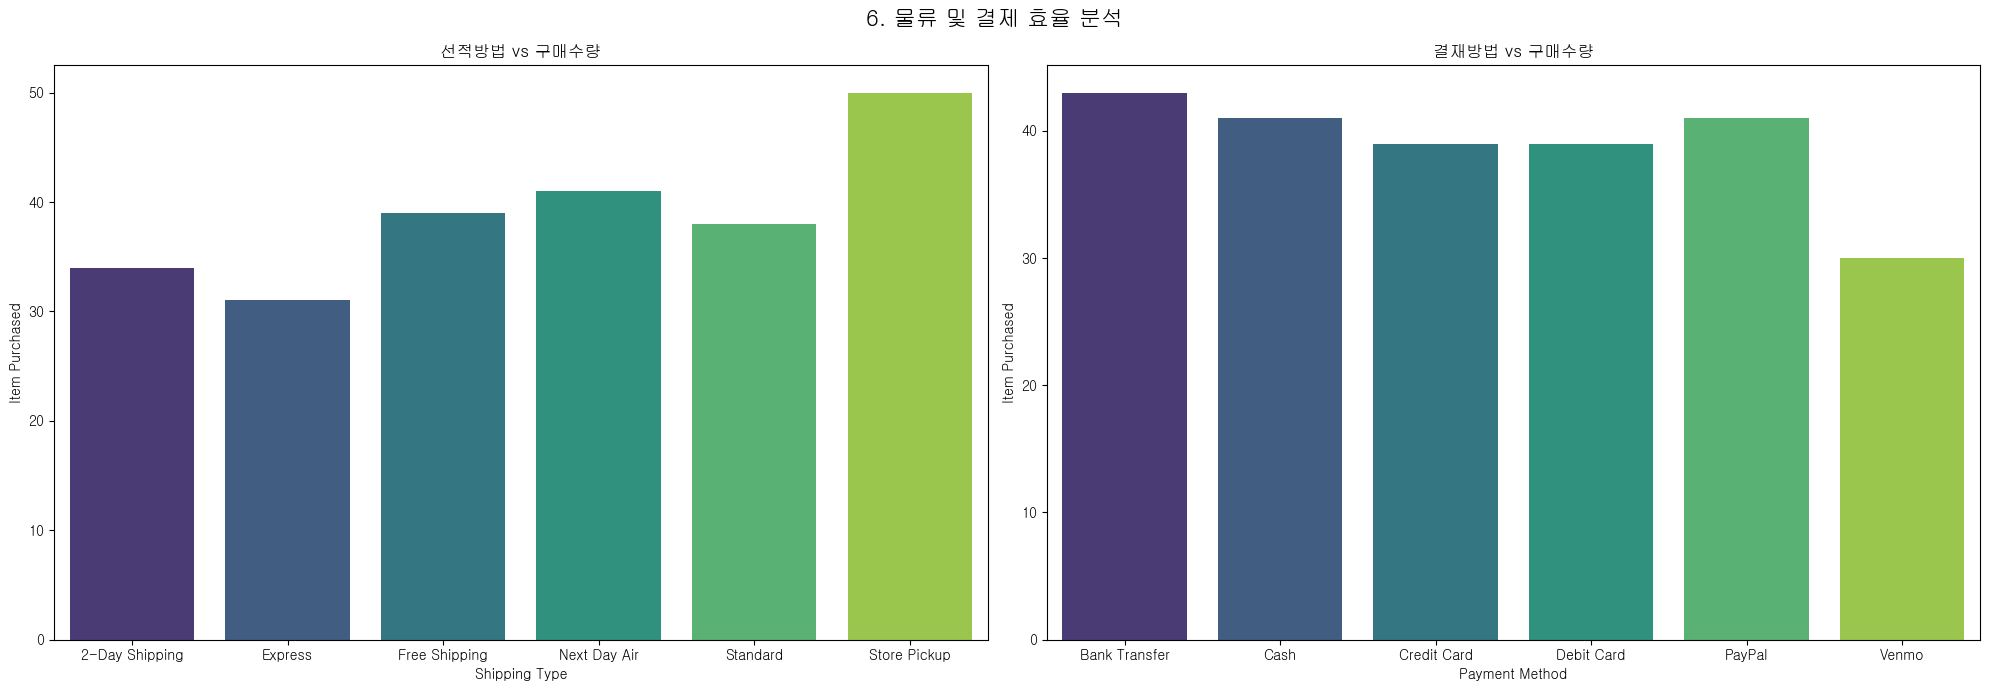

In [26]:
# 6. 물류 및 결제 효율성 분석 
#     배송 선호도 Shipping Type

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

shipping_low_3sales_df = low_3sales_df.groupby(['Shipping Type'])['Item Purchased'].count().reset_index()

sns.barplot(data=shipping_low_3sales_df,
            x='Shipping Type',
            y='Item Purchased',
            hue='Shipping Type',
            palette='viridis',            
            errorbar=None,
            ax=ax[0]            
            )

#     결제 수단 선호도 Payment Method
payment_low_3sales_df = low_3sales_df.groupby(['Payment Method'])['Item Purchased'].count().reset_index()

sns.barplot(data=payment_low_3sales_df,
            x='Payment Method',
            y='Item Purchased',
            hue='Payment Method',
            palette='viridis',            
            errorbar=None,
            ax=ax[1]            
            )

plt.suptitle("6. 물류 및 결제 효율 분석", fontsize=16, fontweight='bold')

# 6. 물류 및 결제 효율성 분석
ax[0].set_title('선적방법 vs 구매수량')
ax[1].set_title('결재방법 vs 구매수량')

plt.tight_layout() 

plt.show()

### 06. 변수간 관계 시각화

### 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

### 08. 데이터 전처리

N/A 

- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

### 09. Feature Engineering
Feature(독립변수, 속성, 열) 가공

- 새로운 변수 생성
- 그룹핑 처리
- 편향개선
- 스케일링 (범위변경)

### 문자형 -> 수치형
1. 범주형 -> 수치값
2. one-hot encoding 해당하는 값만 1이 되도록 변경

### 10. 최종요약/인사이트 도출